# MIS373 - AI For Business - Assignment 2

## Task 2: Weather Phenomenon Recognition

**Student Name:** _Mason Nguyen_

**Student ID:** _222500596_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

**Executive Problem Statement:**

The task was to develop and evaluate deep learning models with different architectures to classify real images of five different weather phenomena: fogsmog, rain, rime, sandstorm, and snow. The dataset consisted of 2,726 images from these five categories. The goal was to explore the dataset, develop and compare the performance of various models for weather phenomenon recognition, identify the class with the worst performance and explain the reasons behind it. Additionally, potential approaches were to be discussed for improving the models' performance to make them suitable for real-world deployment, including strategies related to data collection, data processing, data formatting, and model architecture.

**Executive Solution Statement:**
- Data Preprocessing: Using a 70/30 split for training and testing sets with a fixed seed value of 42

- AI Model Developement: Evaluating five weather phenomenon recognition predictive models, all using AdamW optimiser and keras L2 regularizer

- Report: Model 2 outperformed other architectures across all key metrics, including highest accuracy (0.803178), Kappa score (0.753537), precision, recall, and F1-scores. Although the 'snow' class remained challenging, Model 2's minimal errors, strong correlation between predictions and actuals, and robust generalization to unseen data position it as the optimal solution for reliable real-world deployment in identifying weather conditions from images.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing


1. Importing the dataset from Google Drive into Google Colab
2. The code iterates through folders. For each image file in these folders, it performs the following operations:
 - Reads, decodes and resizes the image to 100x100 pixels
 - Assigns a label based on the folder name

3. The code sets seeds for random number generators to ensure reproducibility
4.Shuffle and split data into train/test sets using a 70:30 ratio
5. The image data is converted to 32-bit floating-point numbers and normalised by dividing by 255
6. Create mapping between category strings and integers, encode labels
7. Sets the default figure size for plotting and display the first 25 images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import pandas as pd

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# to show the folders under the dataset
!ls "/content/drive/My Drive/Colab Notebooks/dataset/Part2_weather_images"

fogsmog  rain  rime  sandstorm	snow


In [4]:
import os

# Set the paths to the folders containing the image files
fogsmog_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Part2_weather_images/fogsmog'
rain_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Part2_weather_images/rain'
rime_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Part2_weather_images/rime'
sandstorm_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Part2_weather_images/sandstorm'
snow_path = '/content/drive/MyDrive/Colab Notebooks/dataset/Part2_weather_images/snow'

# get a list of all files in the folder
fogsmog_file_list = os.listdir(fogsmog_path)
rain_file_list = os.listdir(rain_path)
rime_file_list = os.listdir(rime_path)
sandstorm_file_list = os.listdir(sandstorm_path)
snow_file_list = os.listdir(snow_path)

# print the total number of files
print(f'Total number of files under fogsmog folder are: {len(fogsmog_file_list)}')
print(f'Total number of files under rain folder are: {len(rain_file_list)}')
print(f'Total number of files under rime folder are: {len(rime_file_list)}')
print(f'Total number of files under sandstorm folder are: {len(sandstorm_file_list)}')
print(f'Total number of files under snow folder are: {len(snow_file_list)}')


Total number of files under fogsmog folder are: 550
Total number of files under rain folder are: 526
Total number of files under rime folder are: 550
Total number of files under sandstorm folder are: 550
Total number of files under snow folder are: 550


In [5]:
import os
import tensorflow as tf

# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(fogsmog_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(fogsmog_path, file))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'fogsmog'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(rain_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(rain_path, file))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    # Assign a label to the file
    label = 'rain'
    # Add the image data and label to the data list
    data.append((img, label))

# Repeat the process for the remaining folders
for file in os.listdir(rime_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img = tf.io.read_file(os.path.join(rime_path, file))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    label = 'rime'
    data.append((img, label))

for file in os.listdir(sandstorm_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img = tf.io.read_file(os.path.join(sandstorm_path, file))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    label = 'sandstorm'
    data.append((img, label))

for file in os.listdir(snow_path):
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    img = tf.io.read_file(os.path.join(snow_path, file))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (100, 100))
    label = 'snow'
    data.append((img, label))


In [6]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = '0'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [7]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [8]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1908, 100, 100, 3)
Testing matrix shape (818, 100, 100, 3)


In [9]:
# Create a NumPy array with category strings
categories = np.array(['fogsmog', 'rain', 'rime', 'sandstorm', 'snow'])

# Create a mapping from category strings to integers
category_map = {'fogsmog': 0, 'rain': 1, 'rime': 2, 'sandstorm': 3, 'snow': 4}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The original format of class of the first element in the training dataset is: ', Y_train[0], '\n')

print('The unique integer mapping encoding format of the class of the first element in the training dataset is: ', Y_train[0])


The original format of class of the first element in the training dataset is:  3 

The unique integer mapping encoding format of the class of the first element in the training dataset is:  3


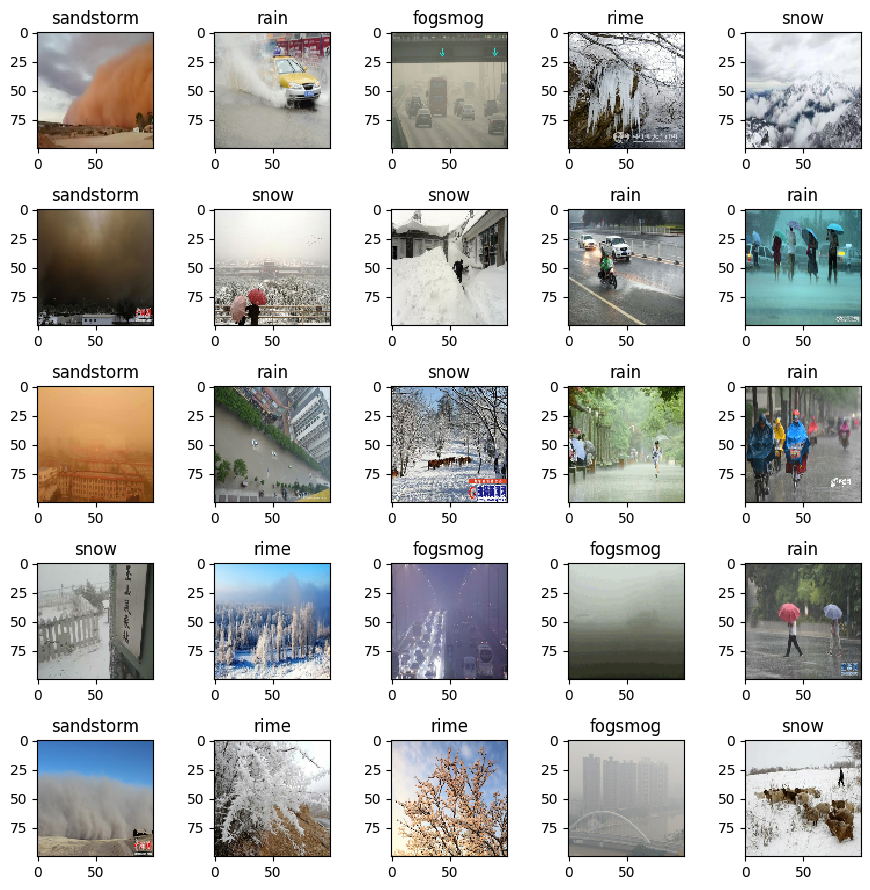

In [10]:
# Change the default figure size for all plots
plt.rcParams['figure.figsize'] = (9, 9)

# Labels corresponding to the categories
labels = ['fogsmog', 'rain', 'rime', 'sandstorm', 'snow']

# Iterate through the first 25 images
for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5, 5, i+1)
    # plt.imshow() function displays the image at index i in the X_train array with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    # Set the title of the subplot to the corresponding label
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()
plt.show()


<a id = "cell_model"></a>
## 3. AI Model Development

1. Define a model architecture using Keras Sequential API with convolutional, pooling, dropout, and dense layers.

2. Convert the labels (`Y_train` and `Y_test`) from integer-encoded format to one-hot encoded categorical format using `to_categorical()`.

3. Compile and train the model

4. Evaluate the trained model's performance:
   - Make predictions on the test set (`X_test`).
   - Calculate accuracy and Cohen's Kappa score.
   - Evaluate on training and test data, printing the loss and accuracy.

5. Plot training and validation metrics over epochs

6. Generate classification report and calculate Cohen's Kappa score.

7. Create and plot the confusion matrix.

8. Define a function `plot_images()` to display a grid of images with their true and predicted labels.

9. Select a range of test images, get their true labels and model predictions.

10. Display the selected test images with their predicted labels, highlighting incorrect predictions.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, AdamW
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

In [12]:
from keras.regularizers import l2

In [13]:
tf.keras.backend.clear_session()
def model_2(img_rows, img_cols, channels, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

In [14]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

In [15]:
img_rows, img_cols = 100, 100  # Image dimensions
channels = 3  # Number of channels (RGB)
num_classes = 5  # Number of weather classes
class_names = ['fogsmog', 'rain', 'rime', 'sandstorm', 'snow']

In [16]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=num_classes)

Y_test = to_categorical(Y_test, num_classes=num_classes)

In [17]:
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Y_train shape: (1908, 5)
Y_test shape: (818, 5)


**Model**

In [18]:
model_b = model_2(img_rows, img_cols, channels, num_classes)
model_b.compile(loss='categorical_crossentropy',
                optimizer=AdamW(learning_rate=0.0001, weight_decay=1e-6),
                metrics=['accuracy'])
hist_2 = model_b.fit(X_train, Y_train,
                   batch_size=128,
                   epochs=100,
                   verbose=2,
                   validation_data=(X_test, Y_test),
                   callbacks=keras_callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 flatten (Flatten)           (None, 76832)             0         
                                                                 
 dense (Dense)               (None, 128)               9834624   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [19]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Make predictions
Y_pred2 = model_b.predict(X_test)
Y_pred_classes2 = np.argmax(Y_pred2, axis=1)

# Convert Y_test from one-hot encoded format to multiclass format
Y_test_classes = np.argmax(Y_test, axis=1)

# Calculate accuracy and Cohen's Kappa
accuracy2 = accuracy_score(Y_test_classes, Y_pred_classes2)
print('Accuracy:', round(accuracy2, 4))

kappa2 = cohen_kappa_score(Y_test_classes, Y_pred_classes2)
print("Cohen's Kappa:", round(kappa2, 3))

26/26 [==============================] - 0s 5ms/step
Accuracy: 0.7861
Cohen's Kappa: 0.732


**Evaluate Model**

In [20]:
# Evaluate on training data
train_score = model_b.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model_b.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.5824
Train accuracy: 0.8978 

Test loss: 0.7535
Test accuracy: 0.7861


**Plot history of Learning**

In [21]:
import math
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

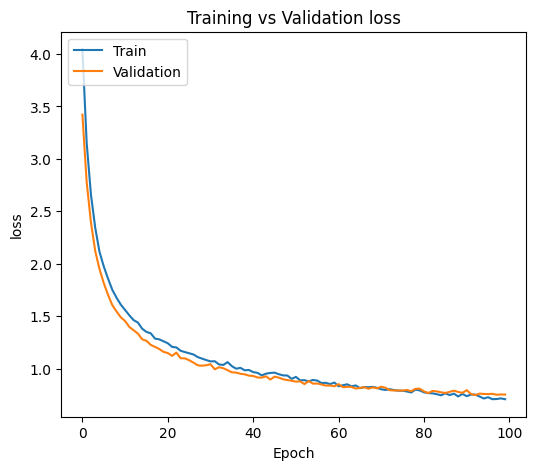

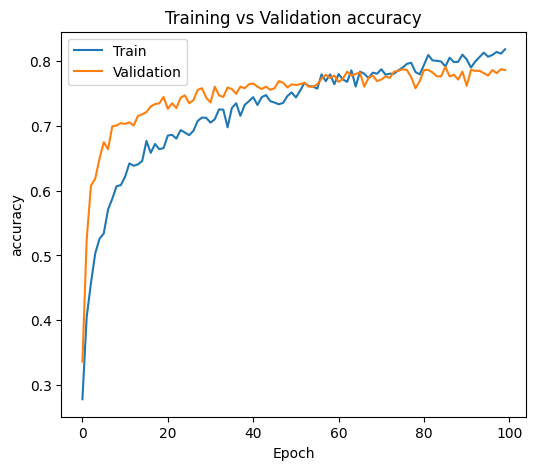

In [22]:
plot_hist(pd.DataFrame(hist_2.history))

Computing the **accuracy, precision, recall, f1-score, and support**

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model_b.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= class_names)

# Print the report
print("The result of the classification report is: \n ",report)

26/26 [==============================] - 0s 4ms/step
The result of Kappa is : 0.732
The result of the classification report is: 
                precision    recall  f1-score   support

     fogsmog       0.76      0.91      0.83       176
        rain       0.84      0.72      0.77       162
        rime       0.73      0.85      0.78       165
   sandstorm       0.90      0.82      0.86       157
        snow       0.74      0.61      0.67       158

    accuracy                           0.79       818
   macro avg       0.79      0.78      0.78       818
weighted avg       0.79      0.79      0.78       818



**Generate Confusion Matrix for inspection**

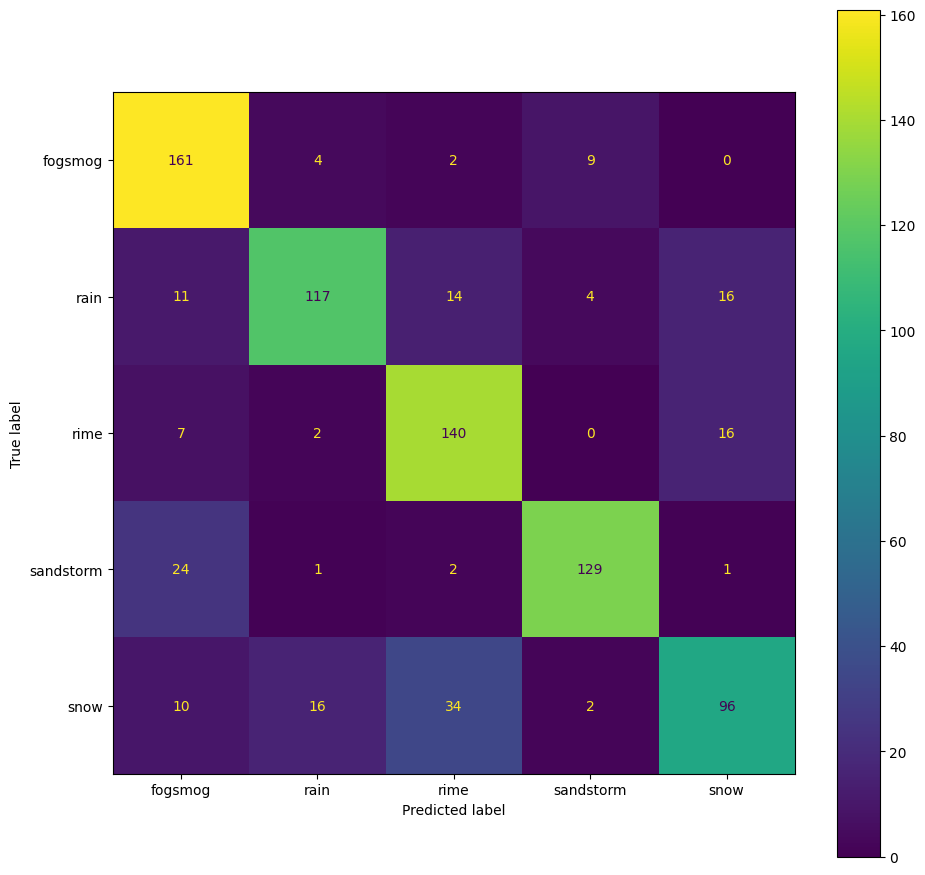

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

In [25]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

1/1 [==============================] - 0s 28ms/step


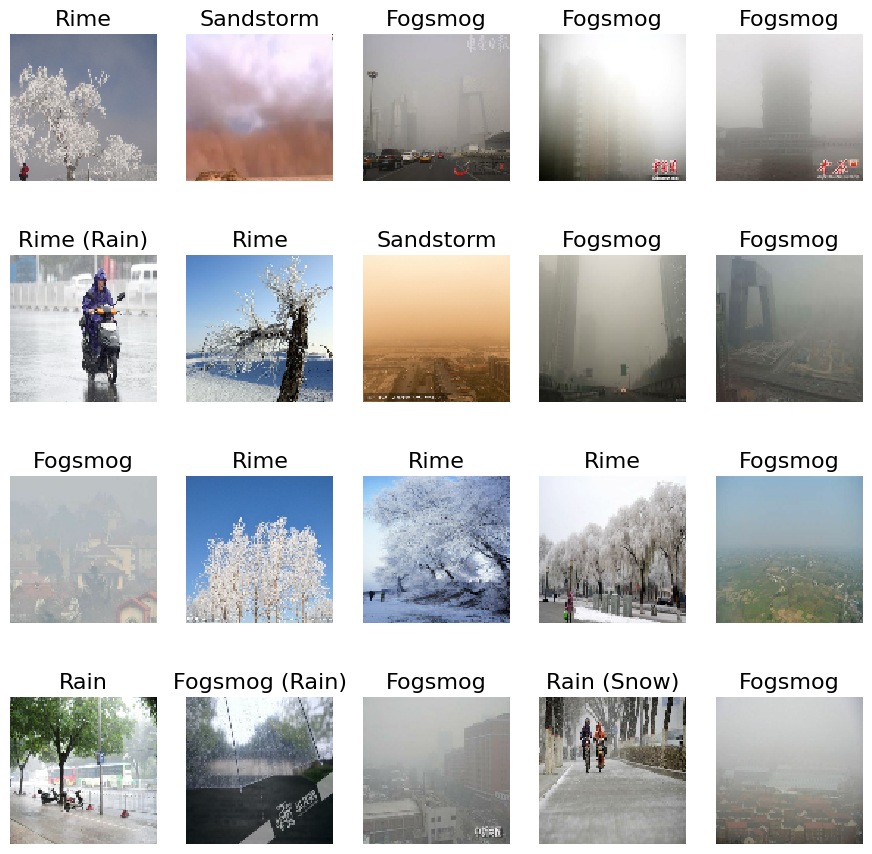

In [27]:
class_names = ["Fogsmog","Rain","Rime","Sandstorm","Snow"]
img_range = range(20)
imgs = X_test[img_range]
img_rows, img_cols = 100, 100
channels = 3
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]
predictions = model_b.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

<a id = "cell_report"></a>
## 4. Experiments Report

**Task 2 – Weather Phenomenon Recognition**

In **Task 2** with the weather phenomenon recognition dataset, **Model 2** outperformed other models across metrics accuracy and Kappa in both training and testing data:

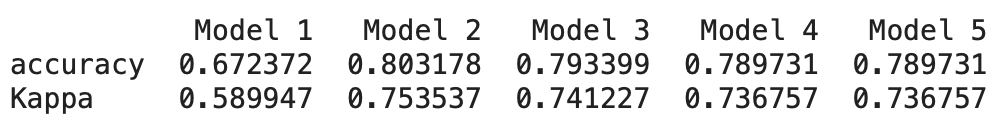

***Table 1: Models Comparison***

Five different Convolutional Neural Network (CNN) models for image classification tasks using the Keras library in Python.:

**1. Model 1**:
- Flattens the input image into a 1D array
- Dense layer with 128 units and ReLU activation, with L2 kernel regularization (0.01)
- Dropout layer with a rate of 0.2 to prevent overfitting
- Output dense layer with softmax activation
- Compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and accuracy metric

**2. Model 2**:
- Convolutional layer with 32 filters of size 3x3 and ReLU activation, taking the input image shape
- Max pooling layer with a 2x2 pool size
- Dropout layer with a rate of 0.25
- Flattening layer
- Dense layer with 128 units and ReLU activation, with L2 kernel regularization (0.01)
- Dropout layer with a rate of 0.5
- Output dense layer with softmax activation
- Compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and accuracy metric

**3. Model 3**:
- Convolutional layer with 32 filters of size 3x3 and ReLU activation, taking the input image shape
- Max pooling layer with a 2x2 pool size
- Convolutional layer with 64 filters of size 3x3 and ReLU activation
- Max pooling layer with a 2x2 pool size
- Flattening layer
- Dense layer with 128 units and ReLU activation, with L2 kernel regularization (0.01)
- Dropout layer with a rate of 0.5
- Output dense layer with softmax activation
- Compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and accuracy metric

**4. Model 4**:
- Convolutional layer with 64 filters of size 5x5 and ReLU activation, taking the input image shape
- Max pooling layer with a 3x3 pool size
- Convolutional layer with 128 filters of size 3x3 and ReLU activation
- Max pooling layer with a 2x2 pool size
- Flattening layer
- Dense layer with 256 units and ReLU activation, with L2 kernel regularization (0.01)
- Dropout layer with a rate of 0.3
- Output dense layer with softmax activation
- Compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.001and accuracy metric

**5. Model 5**:
- Convolutional layer with 32 filters of size 3x3 and ReLU activation, taking the input image shape
- Max pooling layer with a 2x2 pool size
- Convolutional layer with 64 filters of size 3x3 and ReLU activation
- Max pooling layer with a 2x2 pool size
- Convolutional layer with 128 filters of size 3x3 and ReLU activation
- Flattening layer
- Dense layer with 256 units and ReLU activation, with L2 kernel regularization (0.01)
- Dropout layer with a rate of 0.4
- Output dense layer with softmax activation
- Compiled with categorical cross-entropy loss, AdamW optimizer with a learning rate of 0.0001 and accuracy metric

All models are trained using  batch size of 128, 100 epochs, and  `keras_callbacks`.

**Model Performance Comparison**:  Among the five models evaluated, Model 2 achieved the highest accuracy of 0.803178 and Kappa score of 0.753537, indicating superior performance in correctly classifying the weather phenomena images.


**Classification**: Model 2's classification performance across the five classes is as follows:


- Fog/Smog: Precision 0.76, Recall 0.91, F1-score 0.83
- Rain: Precision 0.84, Recall 0.72, F1-score 0.77
- Rime: Precision 0.73, Recall 0.85, F1-score 0.78
- Sandstorm: Precision 0.90, Recall 0.82, F1-score 0.86
- Snow: Precision 0.74, Recall 0.61, F1-score 0.67

The 'snow' class had the lowest recall (0.61) and F1-score (0.67), indicating that Model 2 struggled the most in correctly identifying snow images. This could be due to factors such as similarity with other classes (eg: fogsmog), limited training data for the 'snow' class, or complexity in distinguishing snow patterns.

**Model Evaluation**: Model 2 achieved a train accuracy of 0.8978, train loss 0.5824 and a test accuracy of 0.7861, test lost 0.7535, suggesting good generalization performance on unseen data.

**Model improvement**: Personally, I have test the 5 models on different parameter and optimiser to get the above result. This is the summary of the previous testing before using the AdamW optimiser and L2 regularizer for all the models. The final results not only show a tremendous improvement in the models accuracy, loss and Kappa in both training and testing data but also in the comparison of the classes, plot hist and matrix display. 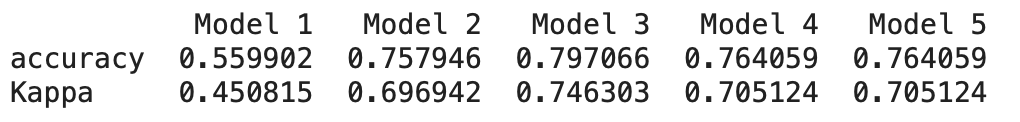

***Table 2: Models Comparison before using AdamW and L2 reguilarizer***

**Recommendations**:
To further improve the weather phenomenon recognition models for real-world deployment, the following approaches could be considered:

- Data Collection: Expand the dataset with more diverse and high-quality images, especially for the 'snow' class, to improve the model's ability to recognize this class accurately.
- Transfer Learning: Leverage pre-trained models on larger datasets and fine-tune them on the weather phenomena dataset, potentially improving performance and reducing training time.
- Ensemble Methods: Combine multiple models (eg: different architectures, hyperparameters) using ensemble techniques like stacking, which could boost overall accuracy.
- Class Weighting: Assign higher weights to the underperforming 'snow' class during training to emphasize its importance and improve its recognition accuracy.